### MeanShift

In this example I demonstrate the MeanShift clustering with the iris dataset. The "ggfortify" package is used to plot the outcome. 

Step-by-step guide:
1. Standardize: it is recommended to standardize X so that each variable has unit variance.
2. MeanShift clustering: either with msClustering() or bmsClustering().
3. Plot the result: by using the principal component analysis (PCA) to plot on a 2D graph.

There are two methods in the MeanShift package:
1. MeanShift "msClutering()": Assume there are $x_1$ to $x_n$ in the dataset $X$ to be clustered. The standand mean shift method finds the **mode** of a cluster and assigns data point $x_n$ to that cluster.
2. Blurring meanShift "bmsClustering()": The blurring meanShift algorithm applies one step of the standard meanShift to the data point $x_n$ in order to obtain a new point $x_m$. Thus each iteration of blurring meanShift will result in a new dataset $\hat{X}$ that is a blurred (smoothed) version of X. Because this algorithm moves points closer to the norm, it takes less iterations and runs faster than the standard mean shift method.

In [2]:
#install.packages("MeanShift")
#install.packages("ggfortify")
library(MeanShift)
library(ggfortify)

##### The original clusters

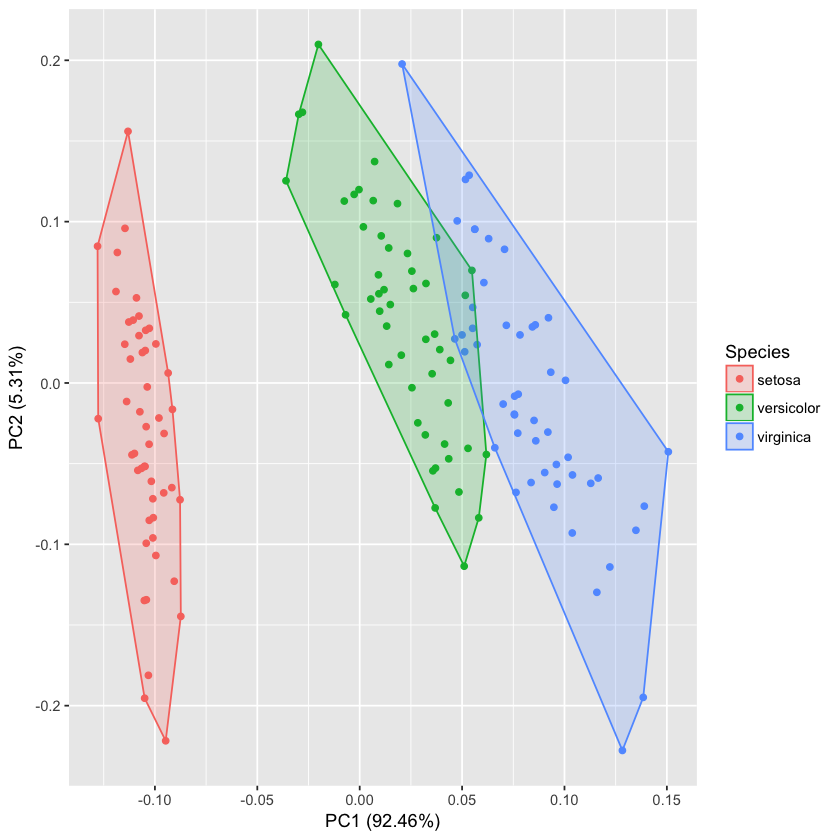

In [41]:
df <- iris[c(1, 2, 3, 4)]
autoplot(prcomp(df), data = iris, colour = 'Species',frame = TRUE)

##### Data preparation: standardize, transpose

In [45]:
set.seed( 2 )
iris.sd<-scale(iris[,1:4])     # mean and sd
iris.data <-t(iris.sd)
head(iris.data)
dim(iris.data)

Sepal.Length,-0.8976739,-1.1392005,-1.3807271,-1.50149039,-1.018437,-0.535384,-1.5014904,-1.0184372,-1.743017,-1.13920048,⋯,1.03453895,1.27606556,-0.05233076,1.1553023,1.0345390,1.0345390,0.5514857,0.7930124,0.4307224,0.06843254
Sepal.Width,1.0156020,-0.1315388,0.3273175,0.09788935,1.245030,1.933315,0.7861738,0.7861738,-0.360967,0.09788935,⋯,0.09788935,0.09788935,-0.81982329,0.3273175,0.5567457,-0.1315388,-1.2786796,-0.1315388,0.7861738,-0.13153881
Petal.Length,-1.3357516,-1.3357516,-1.3923993,-1.27910398,-1.335752,-1.165809,-1.3357516,-1.2791040,-1.335752,-1.27910398,⋯,1.04344975,0.76021149,0.76021149,1.2133927,1.1000974,0.8168591,0.7035638,0.8168591,0.9301544,0.76021149
Petal.Width,-1.3110521,-1.3110521,-1.3110521,-1.31105215,-1.311052,-1.048667,-1.1798595,-1.3110521,-1.311052,-1.44224482,⋯,1.57518674,1.44399406,0.91922335,1.4439941,1.7063794,1.4439941,0.9192234,1.0504160,1.4439941,0.78803068


[1]   4 150

##### Method 1: the MeanShift clustering

* The function mcClustering() can also take multi.core command as shown below (not run).

* Large h: produces a coarser clustering (i.e. few and large clusters). For sufficiently large values of h, the algorithm produces a unique cluster containing all the data points. 
* Small h: produces a finer clustering (i.e. many small clusters). For sufficiently small values of h, each cluster that is identified by the algorithm will contain exactly one data point.

In [49]:
ms_clustering <- msClustering( iris.data, h=1.0 )
print( ms_clustering )
# options( mc.cores=2 )
# ms_clustering <- msClustering( iris.data, multi.core=TRUE )


Running mean-shift algorithm...



  |======================================================================| 100%



Mean-shift algorithm ran successfully.

Finding clusters...

The algorithm found 5 clusters.



$components
                  mode1     mode2      mode3     mode4    mode5
Sepal.Length -1.0658429 -1.622254  0.1482477 0.9527007 2.362935
Sepal.Width   0.6737835 -1.737536 -0.4486421 0.0412864 1.703886
Petal.Length -1.2935937 -1.392399  0.4276364 0.9639342 1.581602
Petal.Width  -1.2540537 -1.179859  0.3240124 1.1808929 1.181609

$labels
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 4 3 4 3 5 4
[112] 3 4 3 3 4 3 5 4 3 4 3 4 3 4 4 3 3 3 4 4 5 3 3 3 4 4 3 3 4 4 4 3 4 4 4 3 3
[149] 4 3



The plot below identifies several outliers: Cluster "2" and "5". 

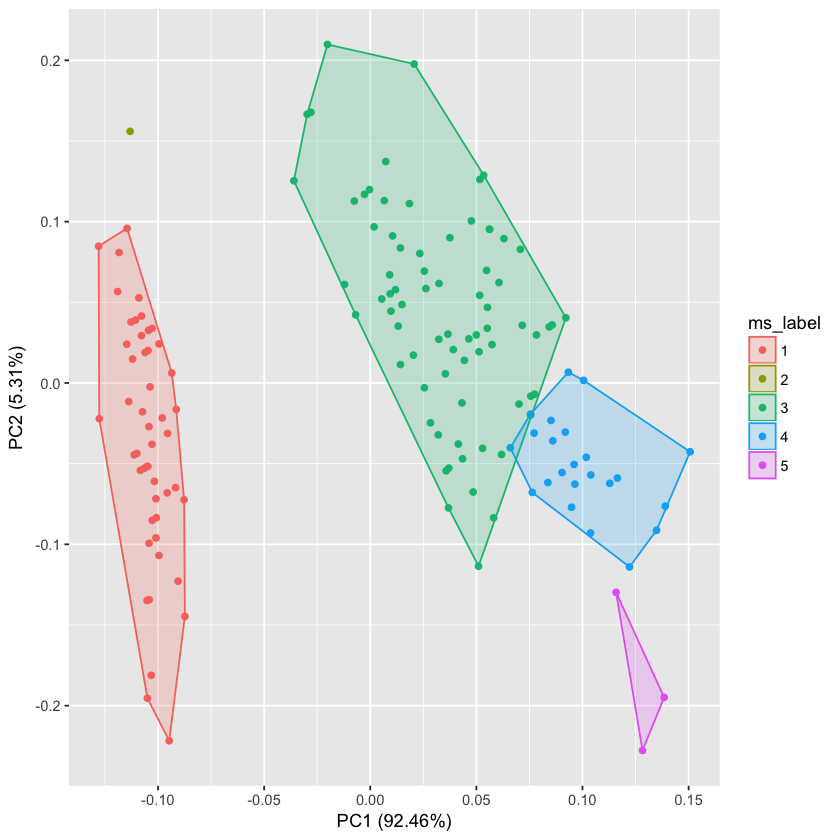

In [50]:
iris_ms <- iris
iris_ms[,'ms_label'] <- ms_clustering[2]
iris_ms[,'ms_label'] <- as.factor(iris_ms[,'ms_label'])
autoplot(prcomp(iris_ms[,1:4]), data = iris_ms, colour = 'ms_label',frame=TRUE)

##### Method 2: The blurring version of the MeanShift

In [51]:
bms_clustering <- bmsClustering( iris.data,h=1.0)
print( bms_clustering )


Running blurring mean-shift algorithm...

Blurring mean-shift algorithm ran successfully.

Finding clusters...

The algorithm found 5 clusters.



$components
                 mode1     mode2      mode3      mode4    mode5
Sepal.Length -1.033532 -1.622254  0.4063374  1.6765868 2.145183
Sepal.Width   0.798703 -1.737536 -0.4064113 -0.2520931 1.561252
Petal.Length -1.295107 -1.392399  0.5852838  1.2941315 1.509153
Petal.Width  -1.254534 -1.179859  0.5679884  1.0634863 1.330223

$labels
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 5 3
[112] 3 3 3 3 3 3 5 4 3 3 3 4 3 3 3 3 3 3 3 4 5 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3



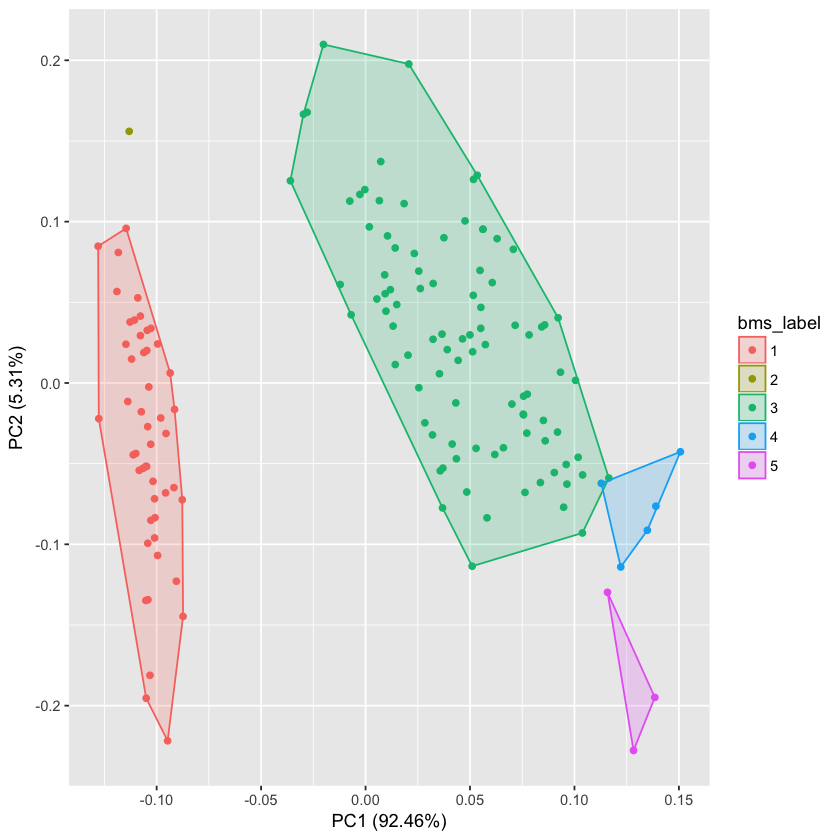

In [52]:
iris_bms <- iris
iris_bms[,'bms_label'] <- bms_clustering[2]
iris_bms[,'bms_label'] <- as.factor(iris_bms[,'bms_label'])
autoplot(prcomp(iris_bms[,1:4]), data = iris_bms, colour = 'bms_label',frame=TRUE)